# Week 1: Introduction to Machine Learning for Smart Buildings

## Outline

1. Key packages
2. Missing values and outliers
3. Exploratory Data Analysis
    * Correlation coefficients
    * Bivariate scatter plots
4. Multiple linear regression

## Exercise

Using the methods introduced at the beginning of this tutorial, explore the Week 1 EnergyPlus dataset. Identify some highly correlated features and build a multiple linear regression model.

## Resources and sources:
* Sections on imputation taken from [sklearn documentation](https://scikit-learn.org/stable/modules/impute.html)
* Outlier detection from [kite.com](https://www.kite.com/python/answers/how-to-remove-outliers-from-a-pandas-dataframe-in-python)

## Key packages
The key packages we'll use throughout this course are:

* [Pandas](https://pandas.pydata.org/docs/user_guide/index.html#user-guide): Python data analysis library. `pandas` is used to handle and pass around our data. The core objects are Series (1 dimensional data vector) and DataFrame (data matrix). You should already be familiar with working in Pandas.
* [Scikit-Learn](https://scikit-learn.org/stable/): Machine learning in Python. `Scikit-learn` is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection and evaluation, and many other utilities.
* [statsmodels](https://www.statsmodels.org/stable/index.html): `statsmodels` provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. An extensive list of result statistics are available for each estimator.
* [seaborn](https://seaborn.pydata.org/introduction.html) and [matplotlib](): `matplotlib` is the base plotting library in Python and we will be dealing with it directly occasionally. `seaborn` is based on `matplotlib` and provides a high-level interface with easier and more attractive default settings. 

We will import these libraries using:

In [1]:
# Import libraries with an alias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

# for sklearn, we typically directly import the classes and functions themselves
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

## Data Cleaning and encoding
For the tutorial, we're going to work with the EnergyPlus dataset. Start by loading in the example data.

In [2]:
DATA_DIR = "data//"
data = pd.read_csv(DATA_DIR + "Week1_EnergyPlus_data_missing.csv")
data = data.rename(columns={"ZONE ONE:Zone Thermal Comfort ASHRAE 55 Simple Model Summer or Winter Clothes Not Comfortable Time [hr](RunPeriod)": "ZONE ONE: Thermal Comfort"}) # Rename for convenience

print(data.shape)
data.head()

(300, 11)


,#,@@ORI@@,@@WINS@@,@@RSA@@,@@OVER@@,@@HS@@,@@LIGHTS@@,Electricity:Facility [J](RunPeriod),DistrictHeating:Facility [J](RunPeriod),DistrictCooling:Facility [J](RunPeriod),ZONE ONE: Thermal Comfort
0,0,78.163820,0.053802,0.418632,1.637014,17.195533,888.799227,9404491280,3.074740e+10,178490805.8,6898.00
1,1,23.607704,0.064955,0.555359,0.132123,16.913773,958.359145,10140513118,2.914795e+10,561839853.9,6807.00
2,2,85.610326,0.083691,0.649926,1.753641,19.757729,893.258468,9451675042,5.590646e+10,264190321.3,6643.50
3,3,69.434576,0.050434,0.552010,0.276761,19.630274,1167.045742,12348651047,4.963759e+10,504282183.7,6417.75
4,4,36.637364,0.069938,0.802213,1.631944,17.901530,976.628502,10333823375,3.743252e+10,345733198.1,6845.00


When we first get a dataset, it's useful to do what's called "Exploratory Data Analysis". This can include visualisations, summary statistics, and correlation analyses to get an idea of what the dataset itself looks like. 

### Summary Statistics
Summary statistics include basic statistics about the dataset and about each of the features, such as mean, standard deviation, range, etc. Our pandas dataframe includes the `describe` method for calculating these statistics.

In [3]:
data.describe()

,#,@@ORI@@,@@WINS@@,@@RSA@@,@@OVER@@,@@HS@@,@@LIGHTS@@,Electricity:Facility [J](RunPeriod),DistrictHeating:Facility [J](RunPeriod),DistrictCooling:Facility [J](RunPeriod),ZONE ONE: Thermal Comfort
count,300.000000,300.000000,300.000000,299.000000,300.000000,299.000000,300.000000,3.000000e+02,2.990000e+02,3.000000e+02,300.000000
mean,149.500000,45.000825,0.059994,0.599514,1.100046,19.006061,999.968039,1.058078e+10,4.658590e+10,3.580113e+08,6083.503333
std,86.746758,26.027286,0.014968,0.122638,0.578518,1.500366,102.280358,1.082241e+09,1.346837e+10,1.097008e+08,1393.964371
min,0.000000,0.115819,0.018069,0.301902,0.101033,14.856340,765.014290,8.094708e+09,1.530385e+10,1.784908e+08,141.000000
25%,74.750000,22.698955,0.049920,0.512303,0.602389,18.000994,926.801849,9.806602e+09,3.726466e+10,2.830893e+08,6092.750000
50%,149.500000,44.962940,0.059976,0.599792,1.099811,19.009791,1000.029863,1.058144e+10,4.573834e+10,3.332100e+08,6745.875000
75%,224.250000,67.495212,0.070055,0.686447,1.599381,20.013459,1072.399832,1.134719e+10,5.586930e+10,4.299519e+08,6818.625000
max,299.000000,89.951274,0.103191,0.879421,2.095032,23.468788,1234.221252,1.305944e+10,8.890929e+10,7.914879e+08,7003.750000


### Dealing with Missing values and outliers

Many real world datasets contain missing values, typically encoded as blanks or NaNs. However, most modelling functions (including sklearn estimators) assume that all values are numerical and that all have and hold meaning, which means it can't deal with missing values. This means we need to deal with them somehow. Often, we might choose to just remove any rows which contain any missing values, but this comes at the cost of losing potentially valuable data. Sometimes a better strategy is to impute the missing values, i.e. to infer them from the known part of the data.

We'll start just with identifying the missing values. And, just to refresh your memory on creating functions, we'll do that within a little function `whats_missing()`


In [4]:
def whats_missing(df: pd.DataFrame):
    if df.isnull().values.any(): # check if anything is missing
        print("This input dataframe is missing values")

        # Total missing values for each feature
        print(df.isnull().sum())
        
        # Total missing values in the whole dataframe
        print(f"Total missing values: {df.isnull().sum().sum()}")
    
    else: print("No missing values!")

whats_missing(data)

This input dataframe is missing values
#                                          0
@@ORI@@                                    0
@@WINS@@                                   0
@@RSA@@                                    1
@@OVER@@                                   0
@@HS@@                                     1
@@LIGHTS@@                                 0
Electricity:Facility [J](RunPeriod)        0
DistrictHeating:Facility [J](RunPeriod)    1
DistrictCooling:Facility [J](RunPeriod)    0
ZONE ONE: Thermal Comfort                  0
dtype: int64
Total missing values: 3


So we have 1 missing value in each of `@@RSA@@`, `@@HS@@`, and `DistrictHeating:Facility [J](RunPeriod)`. The easiest approach is to use the `df.dropna()` method from pandas on the dataframe before splitting into the features and target dataframes. This ensures the corresponding row in the target data is dropped as well. 

In [5]:
data_dropped = data.dropna(how='any')
whats_missing(data_dropped)

No missing values!


Good, we've successfully removed the missing values. However, this will end up removing 3 whole rows of data just to deal with 3 missing values. 

Instead, let's try filling the missing values with an educated guess, called imputation. Missing values can be imputed with a provided constant value, or using the statistics (mean, median, mode) of each column in which the missing values are located.

In [6]:
# Replace using the median
medians = data.median()
print(medians)
data_median = data.fillna(medians)
whats_missing(data_median)

#                                          1.495000e+02
@@ORI@@                                    4.496294e+01
@@WINS@@                                   5.997637e-02
@@RSA@@                                    5.997925e-01
@@OVER@@                                   1.099811e+00
@@HS@@                                     1.900979e+01
@@LIGHTS@@                                 1.000030e+03
Electricity:Facility [J](RunPeriod)        1.058144e+10
DistrictHeating:Facility [J](RunPeriod)    4.573834e+10
DistrictCooling:Facility [J](RunPeriod)    3.332100e+08
ZONE ONE: Thermal Comfort                  6.745875e+03
dtype: float64
No missing values!


For this exercise, we'll impute using the mean value of each column

In [7]:
# Replace using the means
means = data.mean()
print(means)
data = data.fillna(means)
whats_missing(data)

#                                          1.495000e+02
@@ORI@@                                    4.500083e+01
@@WINS@@                                   5.999364e-02
@@RSA@@                                    5.995144e-01
@@OVER@@                                   1.100046e+00
@@HS@@                                     1.900606e+01
@@LIGHTS@@                                 9.999680e+02
Electricity:Facility [J](RunPeriod)        1.058078e+10
DistrictHeating:Facility [J](RunPeriod)    4.658590e+10
DistrictCooling:Facility [J](RunPeriod)    3.580113e+08
ZONE ONE: Thermal Comfort                  6.083503e+03
dtype: float64
No missing values!


## Exploratory Data Analysis
A key initial step in working with a new dataset is exploring the data. For this tutorial, I'm going to focus on `DistrictCooling: Facility [J](RunPeriod)` as the target feature

### Visualisation

Plot a density distribution, with histograms, for each variable (column) in the dataset. 

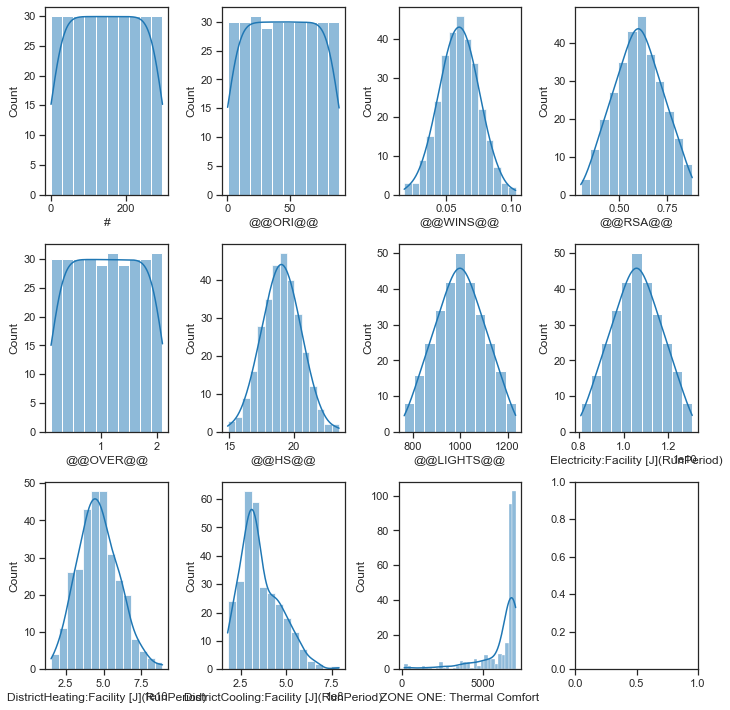

In [8]:
sns.set_style('ticks')  # set plot style
sns.set_context('notebook')    # presets for figure size

fig, axes = plt.subplots(3, 4, figsize=(10,10), squeeze=False)
for i, col in enumerate(data.columns):
    sns.histplot(data[col], ax=axes.flat[i], kde=True)
    # axes.flat[i].set_title(col)
plt.tight_layout(pad=1.01)

## Correlation Coefficients

It's also useful to see some Pearson correlations present within the dataset. To do this, we can use a single function within pandas to create a correlation matrix. 


In [9]:
# Basic pandas correlation table

data.corr()

,#,@@ORI@@,@@WINS@@,@@RSA@@,@@OVER@@,@@HS@@,@@LIGHTS@@,Electricity:Facility [J](RunPeriod),DistrictHeating:Facility [J](RunPeriod),DistrictCooling:Facility [J](RunPeriod),ZONE ONE: Thermal Comfort
#,1.000000,-0.018840,-0.002969,0.007658,0.018474,0.108117,-0.030935,-0.030966,0.115566,-0.041323,-0.141899
@@ORI@@,-0.018840,1.000000,0.025803,-0.001115,0.206322,0.043339,0.004835,0.002413,0.046210,-0.434887,-0.047231
@@WINS@@,-0.002969,0.025803,1.000000,-0.065957,0.049331,-0.069731,-0.066428,-0.072372,0.060287,0.183693,0.075205
@@RSA@@,0.007658,-0.001115,-0.065957,1.000000,-0.024650,0.095677,-0.030387,-0.026105,0.073754,0.256165,-0.089895
@@OVER@@,0.018474,0.206322,0.049331,-0.024650,1.000000,0.057096,0.036067,0.034598,0.071847,-0.799715,0.029570
@@HS@@,0.108117,0.043339,-0.069731,0.095677,0.057096,1.000000,0.037872,0.041549,0.982000,-0.030865,-0.758750
@@LIGHTS@@,-0.030935,0.004835,-0.066428,-0.030387,0.036067,0.037872,1.000000,0.997858,0.001721,0.233987,-0.010768
Electricity:Facility [J](RunPeriod),-0.030966,0.002413,-0.072372,-0.026105,0.034598,0.041549,0.997858,1.000000,-0.001771,0.233200,-0.001409
DistrictHeating:Facility [J](RunPeriod),0.115566,0.046210,0.060287,0.073754,0.071847,0.982000,0.001721,-0.001771,1.000000,-0.023104,-0.801511
DistrictCooling:Facility [J](RunPeriod),-0.041323,-0.434887,0.183693,0.256165,-0.799715,-0.030865,0.233987,0.233200,-0.023104,1.000000,-0.016192


However, this can be difficult to quickly analyse. It's hard to immediately see which features are highly correlated. A better way to present this, as part of exploratory data analysis, is with a heatmap correlation matrix. We'll use the `heatmap` function from the `seaborn` library. Since a correlation matrix is symmetrical about the diagonal, we'll mask the top half of the matrix.

<AxesSubplot:>

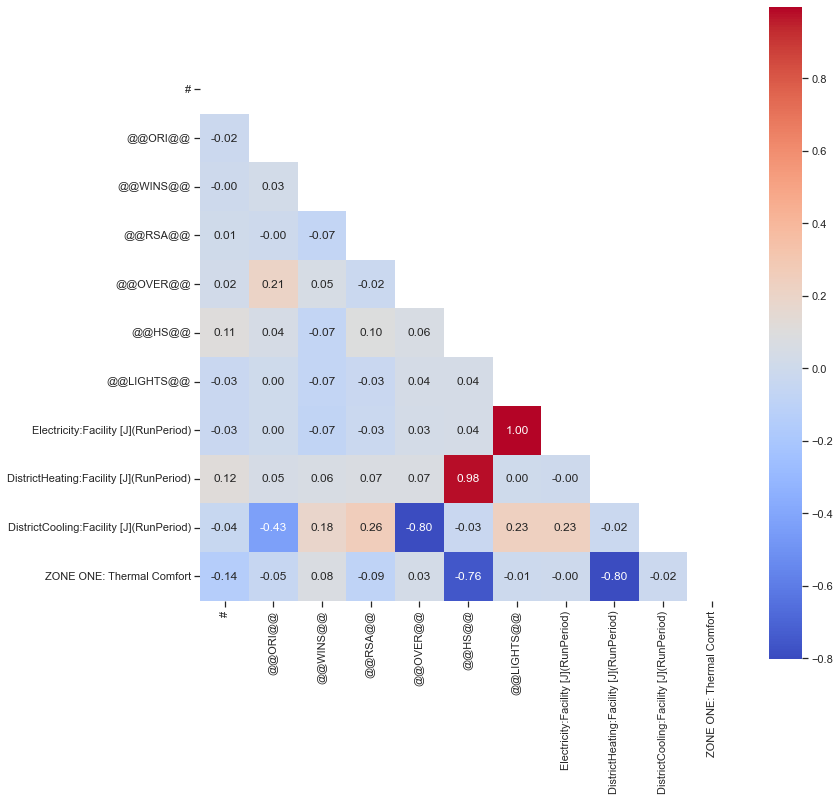

In [10]:
# seaborn heatmap version
matrix = np.triu(data.corr())  # we'll use this to mask half of the symmetrical matrix

fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True, ax=ax, mask=matrix)

### Pairplot

The final and possibly most useful visualisation is the seaborn `pairplot`. However, this gets unwieldy with too many features, so we'll only do it for a subset for now. I have decided on this subset by pulling out the highest correlation coefficient features from the heatmap above.

In the pairplot, we can very clearly see 1) which features have a more consistent correlation, 2) which features may have a non-linear relationship which should be further investigated, and 3) how the distributions relate to these correlations.

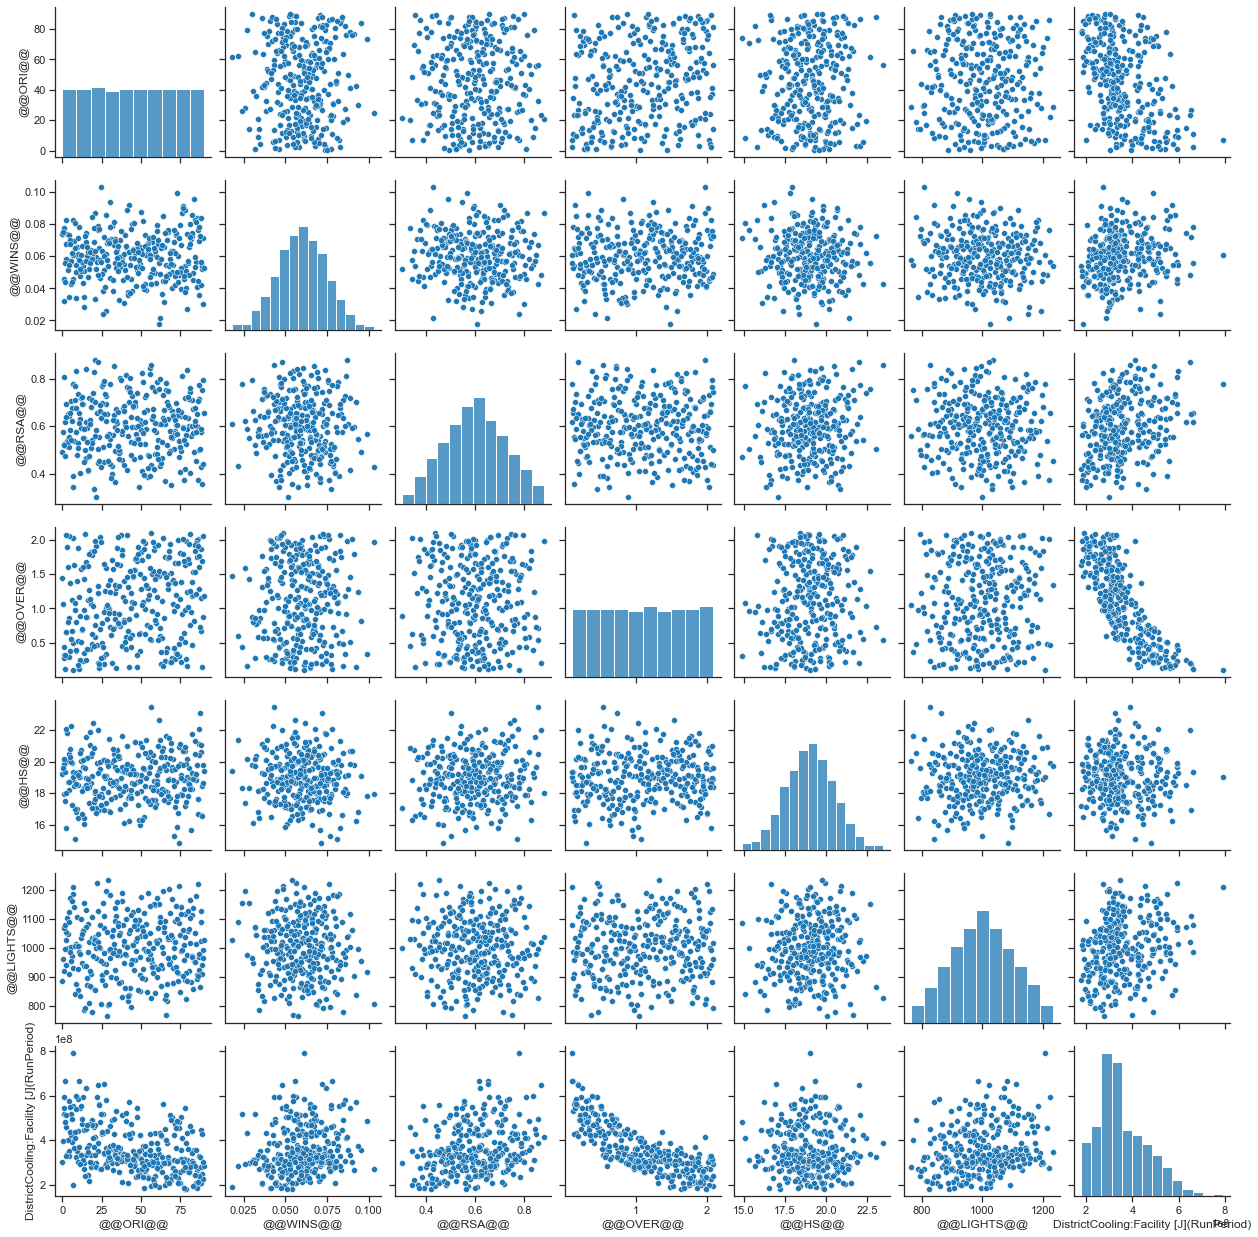

In [11]:
sns.pairplot(data[['@@ORI@@', '@@WINS@@', '@@RSA@@', '@@OVER@@', '@@HS@@', '@@LIGHTS@@', 'DistrictCooling:Facility [J](RunPeriod)']])

### Outliers
We've successfully dealt with any missing values and explored the data, but we're not done cleaning our dataset yet. Next we need to identify any outlier values and decide what to do with them (usually we'll just remove them). It's important to consider what your data actually is and decide whether it's appropriate to remove outliers. 

In physical measurement data (e.g. outdoor temperature), an extreme outlier (say, 250C) probably indicates equipment failure or a typo. In this case, it's definitely necessary to remove. However, for some other types of data outliers may represent important and valid datapoints. For instance, if we've surveyed master's students and one student lists their age as 64, this would be classed as an outlier with most methods, but it's likely this is just a mature student whose data should remain in the dataset. 

As always, there are a few methods for identifying and dealing with outliers. For now, we'll stick with the z-score method. 

In [12]:
from scipy import stats
z_scores =stats.zscore(data)
abs_z_scores = np.abs(z_scores)

print(abs_z_scores)

            #   @@ORI@@  @@WINS@@   @@RSA@@  @@OVER@@    @@HS@@  @@LIGHTS@@  \
0    1.726287  1.276292  0.414338  1.479865  0.929729  1.210767    1.088719   
1    1.714740  0.823323  0.332017  0.361250  1.675904  1.399190    0.407492   
2    1.703193  1.562873  1.585828  0.412439  1.131661  0.502668    1.045048   
3    1.691646  0.940343  0.639721  0.388649  1.425472  0.417434    1.636256   
4    1.680099  0.321871  0.665498  1.658358  0.920951  0.738640    0.228573   
..        ...       ...       ...       ...       ...       ...         ...   
295  1.680099  1.291850  0.511445  1.605905  0.363322  1.042060    1.629293   
296  1.691646  0.620000  0.389380  1.188310  0.406577  0.481842    2.294132   
297  1.703193  1.235038  0.836656  1.868803  1.014857  0.489866    0.105383   
298  1.714740  0.917118  0.334677  0.367944  1.536809  1.440225    0.434853   
299  1.726287  0.242450  1.230160  0.228549  1.529244  0.392062    0.576320   

     Electricity:Facility [J](RunPeriod)  \
0      

In [13]:
threshold = 3
filtered_entries = (abs_z_scores < threshold).all(axis=1)
outlier_locs = np.where(abs_z_scores > threshold) # first array contains the list of row numbers and second array respective column numbers, which means z[55][1] has a Z-score higher than 3
print(outlier_locs)

(array([121, 124, 143, 170, 170, 193, 202, 227, 233, 288, 288, 292]), array([10, 10,  9,  8, 10, 10, 10, 10, 10,  8, 10, 10]))


In order to look more closely at the outliers, we'll construct a dataframe which includes only the rows which have outliers, and the outlier values themselves.

In [14]:
df = pd.DataFrame(index = set(outlier_locs[0]), columns=data.columns)

for i, row in enumerate(outlier_locs[0]):
    col = outlier_locs[1][i]
    df.loc[row][col] = data.iloc[row][col]
df

,#,@@ORI@@,@@WINS@@,@@RSA@@,@@OVER@@,@@HS@@,@@LIGHTS@@,Electricity:Facility [J](RunPeriod),DistrictHeating:Facility [J](RunPeriod),DistrictCooling:Facility [J](RunPeriod),ZONE ONE: Thermal Comfort
288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88823324173.0,NaN,152.0
193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1312.75
227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1545.5
292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1660.25
233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1315.75
170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88909294812.0,NaN,182.75
202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,519.75
143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,791487884.2,NaN
121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,418.75
124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,141.0


By looking at this dataframe of outliers, we can make some informed decisions about whether or not to remove an outlier. This is much better than indiscriminately removing outliers, because automatic methods (like looking just at the z-score) don't really know what to expect. 


In [15]:
# Remove identified outliers
data = data.drop(df.index)
data

,#,@@ORI@@,@@WINS@@,@@RSA@@,@@OVER@@,@@HS@@,@@LIGHTS@@,Electricity:Facility [J](RunPeriod),DistrictHeating:Facility [J](RunPeriod),DistrictCooling:Facility [J](RunPeriod),ZONE ONE: Thermal Comfort
0,0,78.163820,0.053802,0.418632,1.637014,17.195533,888.799227,9404491280,3.074740e+10,178490805.8,6898.00
1,1,23.607704,0.064955,0.555359,0.132123,16.913773,958.359145,10140513118,2.914795e+10,561839853.9,6807.00
2,2,85.610326,0.083691,0.649926,1.753641,19.757729,893.258468,9451675042,5.590646e+10,264190321.3,6643.50
3,3,69.434576,0.050434,0.552010,0.276761,19.630274,1167.045742,12348651047,4.963759e+10,504282183.7,6417.75
4,4,36.637364,0.069938,0.802213,1.631944,17.901530,976.628502,10333823375,3.743252e+10,345733198.1,6845.00
...,...,...,...,...,...,...,...,...,...,...,...
295,295,11.433560,0.052351,0.403227,0.890209,20.564312,833.601373,8820436159,6.078228e+10,293432611.6,4930.50
296,296,28.890825,0.054175,0.454269,1.334866,19.726587,1234.221252,13059443175,5.131458e+10,348393013.4,6402.75
297,297,77.091893,0.047491,0.371093,1.686180,18.273537,1010.728668,10694641321,3.844540e+10,183347407.1,6844.00
298,298,68.831095,0.054993,0.554541,0.212458,21.159710,1044.370754,11050612269,6.554820e+10,490233181.4,3650.25


## Multiple Linear Regression Model

*Aim:* Create a multiple linear regression model to predict the median value house price. 

To fit a linear regression model, we select those features which have a high correlation with our target variable `DistrictCooling`. By looking at the correlation matrix and the pairplots, we can see that `@@OVER@@` has a strong negative correlation (-0.8) and `@@ORI@@` also has a high negative correlation (-0.43). We can note that `@@OVER@@` may not have a strictly linear relationship, but for now we'll ignore this and treat it as a linear feature.

*Note*: an important point in selecting features for a linear regression model is to check for multicollinearity. 

Based on this, we'll use `@@OVER@@`, `@@ORI@@` and `@@RSA@@` as our two features for predicting the target variable, `DistrictCooliing`.

### Libraries - `statsmodels` or Sci-kit learn?

As probably the most common method for predictive modelling, there are many packages available for conducting multiple linear regression. The two most popular for Python are `statsmodels` and `sklearn`. Both of these libraries contain many different algorithms and models. `statsmodels` takes a more statistics-focussed approach, while `sklearn` is geared towards a predictive machine learning approach. In general, `sklearn` has a broader array of algorithms available and is simpler to use, with a fairly consistent interface regardless of the particular model you want to build. On the other hand, `statsmodels` offers tools more similar to industry-standard statistics tools like Stata and R. There's more of an emphasis on understanding the relevant variables and effect size, as opposed to just finding the model with the best fit. 

In general, this module will focus on `sklearn` as it interfaces better with the advanced ML and neural network libraries later on, but we'll start with `statsmodels` and use it again for more regression modelling. 

### Multiple Linear Regression with `statsmodels`:

[from the `statsmodels` documentation](https://www.statsmodels.org/stable/index.html): `statsmodels` is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. And extensive list of result statistics are available for each estimator. `statsmodels` supports specifying models using R-style formulas and `pandas` DataFrames. 

The R-style formula referred to here uses the following format: `Dependent ~ Indep1 + Indep2 + Indep3`. We'll see how this can be used as an input to the modelling function call later. 

In [16]:
# Step 1: Select input variables to use in regression
X = data[['@@ORI@@', '@@RSA@@', '@@OVER@@']]
X = sm.add_constant(X)  # add an intercept

# choose the output variable
y = data['DistrictCooling:Facility [J](RunPeriod)']

# Step 2: fit (train) the model
model = sm.OLS(y, X).fit()

# print the model summary
print(model.summary())

                                       OLS Regression Results                                      
Dep. Variable:     DistrictCooling:Facility [J](RunPeriod)   R-squared:                       0.771
Model:                                                 OLS   Adj. R-squared:                  0.769
Method:                                      Least Squares   F-statistic:                     321.6
Date:                                     Mon, 10 Jan 2022   Prob (F-statistic):           2.78e-91
Time:                                             12:08:49   Log-Likelihood:                -5557.8
No. Observations:                                      290   AIC:                         1.112e+04
Df Residuals:                                          286   BIC:                         1.114e+04
Df Model:                                                3                                         
Covariance Type:                                 nonrobust                                         


Text(0, 0.5, 'Cooling pred')

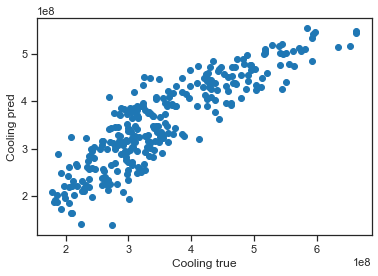

In [17]:
##Step 3: Evaluate the performance of the model

#uses the model to make predictions using the inputs
predictions = model.predict(X)

#plot the model predictions vs true values
import matplotlib.pyplot as plt
%matplotlib inline

##make a scatter plot
ax1 = plt.scatter(y, predictions)

plt.xlabel('Cooling true')
plt.ylabel('Cooling pred')

We can evaluate our model using RMSE and the adjusted-$R^2$ value (which should have been covered in the lecture). The AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion) are also available in the model summary, and are very useful metrics for evaluating model performance, particularly for complex models as they penalise model complexity. We will look at these later.

In [18]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y, predictions, squared=False)  # squared=True gives the MSE, False gives RMSE
adj_r2 = model.rsquared_adj

print("Model performance")
print("-----------------")
print(f"RMSE is {np.round(rmse, 2)}")
print(f"Adjusted R^2 is  {np.round(adj_r2, 2)}")

Model performance
-----------------
RMSE is 50927244.25
Adjusted R^2 is  0.77


What counts as a "good" $R^2$ value depends on your data and particularly on what your target variable is. 